# Dataset1:Vincent Van Gogh

I decided to start with a particular artist. As the most representative figure of Impressionism and painters born in the Netherlands, Vincent van Gogh is the first artist I dig into.

In [3]:
#import library
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup # library to parse HTML documents
import re

## Step1 Data Aquisition
Rijksmuseum ApI

By combining the two APIs of Rijksmuseum, I set the artist's name(involvedMaker)as a variable and build a small pandas data frame and then use the unique object number of each artwork to acquire its detailed information covering the title, url_image, maker, width, height, colors, description, place of birth, date of birth, place of death, date of death, occupation, roles, nationality, production places, acquisition_method, acquisition_date, materials,icon class description, physical medium.


In [115]:
#keys and url
api_key ="XXX"
involvedMaker="Vincent+van+Gogh"
url="https://www.rijksmuseum.nl/api/nl/collection?key="+api_key+"&involvedMaker="+involvedMaker+"&chronologic&ps=100"
response = requests.get(url).json()

#data store in pandas
df_v = pd.DataFrame(columns=['object_id','objectNumber','title','maker','width','height'])

# first search general info via key word;
for artobject in response['artObjects']:
    if artobject['principalOrFirstMaker'] == 'Vincent van Gogh':
      object_id = artobject['id']
      objectNumber = artobject['objectNumber']
      title = artobject['title']
      url_image = artobject['webImage']['url']
      #print(url_image)
      maker = artobject['principalOrFirstMaker']
      width = artobject['webImage']['width']
      height = artobject['webImage']['height']
#then use objectNumber as the primary key to link details;
#remove T in time and turn list into str;
      url_detail = "https://www.rijksmuseum.nl/api/nl/collection/"+objectNumber+"?key="+api_key
      response_detail = requests.get(url_detail).json()
      colors = response_detail['artObject']['colors']
      # print(colors)
      colors_WithNormalization = response_detail['artObject']['colorsWithNormalization']
      normalizedColors = response_detail['artObject']['normalizedColors']
      description = response_detail['artObject']['description']
      presentingDate = response_detail['artObject']['dating']['presentingDate']
      #print(presentingDate)
      placeOfBirth = response_detail['artObject']['principalMakers'][0]['placeOfBirth']
      dateOfBirth = response_detail['artObject']['principalMakers'][0]['dateOfBirth']
      placeOfDeath = response_detail['artObject']['principalMakers'][0]['placeOfDeath']
      dateOfDeath = response_detail['artObject']['principalMakers'][0]['dateOfDeath']
      occupation = response_detail['artObject']['principalMakers'][0]['occupation']
      occupation_str = ", ".join(occupation) 
      roles = response_detail['artObject']['principalMakers'][0]['roles']
      roles_str = ", ".join(roles) 
      nationality = response_detail['artObject']['principalMakers'][0]['nationality']
      productionPlaces = response_detail['artObject']['principalMakers'][0]['productionPlaces']
      productionPlaces_str = ", ".join(productionPlaces)
      acquisition_method = response_detail['artObject']['acquisition']['method']
      acquisition_date = response_detail['artObject']['acquisition']['date']
      acquisition_date = acquisition_date.split('T')[0]
      materials = response_detail['artObject']['materials']
      materials_str = ", ".join(materials)
      iconClassDescription = response_detail['artObject']['classification']['iconClassDescription']
      iconClassDescription_str = ", ".join(iconClassDescription)
      physicalMedium = response_detail['artObject']['physicalMedium'] 
      #print(objectNumber)
 
 #append all data needed into pandas dataframe;     
      df_v=df_v.append({'object_id':object_id, 'objectNumber':objectNumber,
       'title':title,'url':url_image, 'maker':maker,
        'width':width, 'height':height,
        'colors':colors,'colors_WithNormalization':colors_WithNormalization, 
        'normalizedColors':normalizedColors,'description':description,
         'placeOfBirth':placeOfBirth, 'dateOfBirth':dateOfBirth,
          'placeOfDeath':placeOfDeath, 'dateOfDeath':dateOfDeath,
          'occupation':occupation_str, 'roles':roles_str,
          'nationality':nationality, 'productionPlaces':productionPlaces_str,
           'acquisition_method':acquisition_method, 'acquisition_date':acquisition_date,
           'materials':materials_str,'iconClassDescription':iconClassDescription_str,
           'physicalMedium':physicalMedium,'presentingDate':presentingDate}, ignore_index=True)

<ipython-input-115-5beb5d6a6f40>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v=df_v.append({'object_id':object_id, 'objectNumber':objectNumber,
<ipython-input-115-5beb5d6a6f40>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v=df_v.append({'object_id':object_id, 'objectNumber':objectNumber,
<ipython-input-115-5beb5d6a6f40>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v=df_v.append({'object_id':object_id, 'objectNumber':objectNumber,
<ipython-input-115-5beb5d6a6f40>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v=df_v.append({'object_id':object_id, 'objectNumber':objectNumber,
<ipython-input-115-5beb5d6a6f40>

In [116]:
df_v

,object_id,objectNumber,title,maker,width,height,url,colors,colors_WithNormalization,normalizedColors,...,occupation,roles,nationality,productionPlaces,acquisition_method,acquisition_date,materials,iconClassDescription,physicalMedium,presentingDate
0,nl-SK-A-3262,SK-A-3262,Zelfportret,Vincent van Gogh,2034,2562,https://lh3.googleusercontent.com/Ckjq-HkB2XhE...,"[{'percentage': 44, 'hex': '#52686D'}, {'perce...","[{'originalHex': '#52686D', 'normalizedHex': '...","[{'percentage': 44, 'hex': '#2F4F4F'}, {'perce...",...,"prentmaker, tekenaar, schilder, lithograaf",schilder,Nederlands,,schenking,1936-06-01,"karton, olieverf","portrait, self-portrait of painter, portrait, ...",olieverf op karton,1887
1,nl-RP-T-1962-65,RP-T-1962-65,Landschap bij de abdij van Montmajour te Arles,Vincent van Gogh,2500,2013,https://lh6.ggpht.com/d91eLpUD7w8vhaGPWNvuzmkU...,[],[],[],...,"prentmaker, tekenaar, schilder, lithograaf",tekenaar,Nederlands,,aankoop,1962-01-01,"papier, krijt, inkt, potlood","plain, abbey, monastery, convent ~ Roman Catho...","potlood, rietpen en verenpen in inkt, op velij...",1888
2,nl-SK-A-3307,SK-A-3307,Boerendorp in de avond,Vincent van Gogh,2865,1992,https://lh3.googleusercontent.com/rN30IB00bIGE...,"[{'percentage': 20, 'hex': '#8E8459'}, {'perce...","[{'originalHex': '#8E8459', 'normalizedHex': '...","[{'percentage': 48, 'hex': '#696969'}, {'perce...",...,"prentmaker, tekenaar, schilder, lithograaf",schilder,Nederlands,,schenking,1940-03-01,"doek, olieverf","village, evening",olieverf op doek,1884
3,nl-SK-A-3662,SK-A-3662,Bloemkwekerij van Pierre van de Putte aan de S...,Vincent van Gogh,2946,2094,https://lh6.ggpht.com/RvKoP3sO4nXgRlIvSGLDcezV...,"[{'percentage': 1, 'hex': '#383C37'}, {'percen...","[{'originalHex': '#383C37', 'normalizedHex': '...","[{'percentage': 30, 'hex': '#A9A9A9'}, {'perce...",...,"prentmaker, tekenaar, schilder, lithograaf",tekenaar,Nederlands,Den Haag,legaat,1944-01-01,"papier, dekverf, potlood","garden, horticulture, vegetable culture, marke...","potlood, pen en penseel in inkt, gewassen, geh...",1882
4,nl-RP-T-1952-125,RP-T-1952-125,Schelpenvisser,Vincent van Gogh,2183,3000,https://lh4.ggpht.com/p0gQfwn5ryZ6Fazbkv9dG2MG...,[],[],[],...,"prentmaker, tekenaar, schilder, lithograaf",tekenaar,Nederlands,,aankoop,1952-04-08,"papier, potlood, krijt","fisherman, sports, games ~ animals","potlood en zwart krijt, penseel in kleuren, op...",1863 - 1890
5,nl-SK-A-2225,SK-A-2225,Weg achter de pastorietuin te Nuenen,Vincent van Gogh,2500,1838,https://lh5.ggpht.com/QjSoKZOeS1lkYXUgPHgy9W3Z...,"[{'percentage': 29, 'hex': '#C4B291'}, {'perce...","[{'originalHex': '#C4B291', 'normalizedHex': '...","[{'percentage': 46, 'hex': '#D2B48C'}, {'perce...",...,"prentmaker, tekenaar, schilder, lithograaf",tekenaar,Nederlands,,schenking,1906-04-01,"papier, potlood","trees: pollard willow, male sex; man, carrying...","potlood, pen en penseel in bruin",1884
6,nl-SK-A-2226,SK-A-2226,Boerderij in de Provence,Vincent van Gogh,2500,1836,https://lh3.ggpht.com/3fR9EhgRFF_kz66r1WVv7Gtg...,"[{'percentage': 54, 'hex': '#D5C6A4'}, {'perce...","[{'originalHex': '#D5C6A4', 'normalizedHex': '...","[{'percentage': 54, 'hex': '#F5DEB3'}, {'perce...",...,"prentmaker, tekenaar, schilder, lithograaf",tekenaar,Nederlands,,schenking,1906-04-01,"papier, potlood","folk costume, regional costume",potlood en pen in bruin op papier,ca. 1888
7,nl-SK-A-2227,SK-A-2227,"Korensnijder met hoed, van achteren gezien",Vincent van Gogh,1921,2500,https://lh5.ggpht.com/LeONPNh8oPUpjMUWxUe3d0G_...,[],[],[],...,"prentmaker, tekenaar, schilder, lithograaf",tekenaar,Nederlands,,schenking,1906-04-01,"papier, krijt, potlood","reaping, picking, mowing ~ harvest, agricultur...","potlood, zwart krijt en penseel in bruin",1885
8,nl-RP-P-OB-20.603,RP-P-OB-20.603,Portret van dr. Gachet,Vincent van Gogh,2376,2832,https://lh5.ggpht.com/eiAJJM9_EByX03PBlrRBULoa...,"[{'percentage': 41, 'hex': '#BFB69A'}, {'perce...","[{'originalHex': '#BFB69A', 'normalizedHex': '...","[{'perc

In [ ]:
#save to csv;
df_v.to_csv("Vincent van Gogh.csv")

After forming the database, I first select one particular artwork---the Self Portrait of Vincent van Gogh and visualize the color composition via a bar chart and the painting image is attached for comparison.

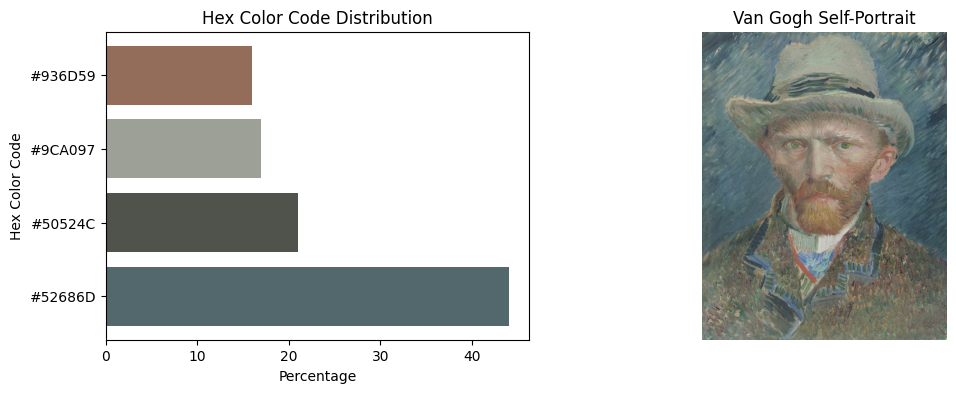

In [118]:
#visulize hex code for Zelfportret;
colors_Zelfportret = df_v.iloc[0,7]
#print(colors_Zelfportret)

img = Image.open('selfportrait.jpeg')

# Extract the color codes and percentages from the metadata
color_codes = [color['hex'].strip() for color in colors_Zelfportret if color['percentage'] != 0]
percentages = [color['percentage'] for color in colors_Zelfportret if color['percentage'] != 0]

# Create a horizontal bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the hex color distribution in the left subplot
ax1.barh(color_codes, percentages, color=color_codes)
ax1.set_xlabel('Percentage')
ax1.set_ylabel('Hex Color Code')
ax1.set_title('Hex Color Code Distribution')

# Plot the self-portrait image in the right subplot
ax2.imshow(img)
ax2.axis('off')
ax2.set_title('Van Gogh Self-Portrait')

# Show the plot
plt.show()

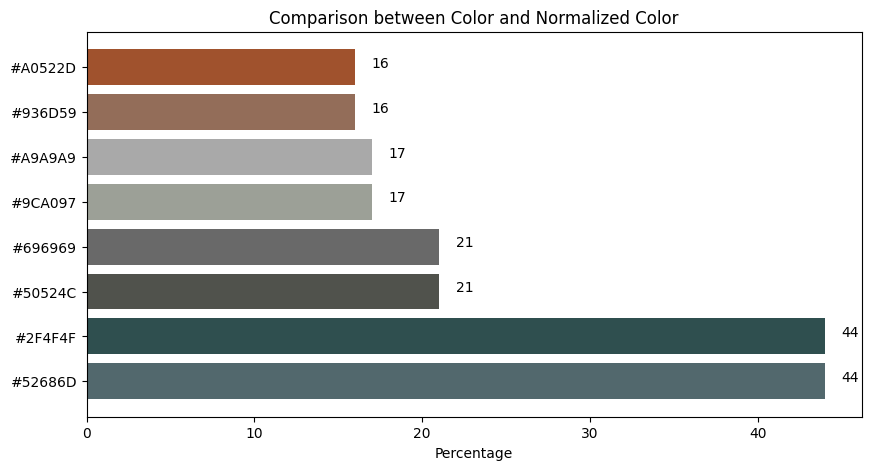

In [123]:
# Compare the difference between colors and nomalized colors;
colors_Zelfportret_normalized = df_v.iloc[0,9]
# Extract the color codes and percentages from the metadata
color_codes = [color['hex'].strip() for color in colors_Zelfportret if color['percentage'] != 0]
percentages = [color['percentage'] for color in colors_Zelfportret if color['percentage'] != 0]

# Extract the color codes and percentages(normalized) from the metadata
color_codes_normalized = [color['hex'].strip() for color in colors_Zelfportret_normalized if color['percentage'] != 0]
percentages_normalized = [color['percentage'] for color in colors_Zelfportret_normalized if color['percentage'] != 0]

# Merge the two lists of color codes and percentages
all_color_codes = color_codes + color_codes_normalized
all_percentages = percentages + percentages_normalized

# Sort the data by percentage in descending order
data = sorted(zip(all_color_codes, all_percentages), key=lambda x: x[1], reverse=True)
sorted_color_codes, sorted_percentages = zip(*data)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the hex color distribution
ax.barh(range(len(sorted_color_codes)), sorted_percentages, color=sorted_color_codes, label='Original')

# Add labels to the bars
for i, v in enumerate(sorted_percentages):
    ax.text(v + 1, i, str(round(v, 2)), color='black')

# Set the y-ticks and labels
ax.set_yticks(range(len(sorted_color_codes)))
ax.set_yticklabels(sorted_color_codes, fontsize=10)

# Set the x-label and title
ax.set_xlabel('Percentage')
ax.set_title('Comparison between Color and Normalized Color')

# Show the plot
plt.show()

Among the ten paintings in our small van Gogh dataset, seven of them contains hex color code. Thus, we are able to see color pie chart from seven paintings. It's clear to see the color choice is somber ang gloomy.

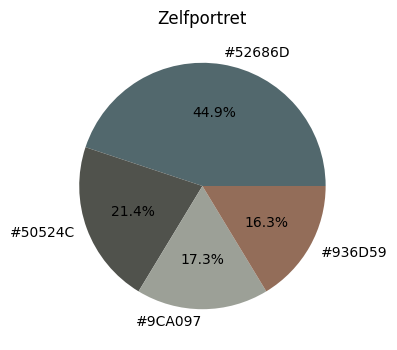

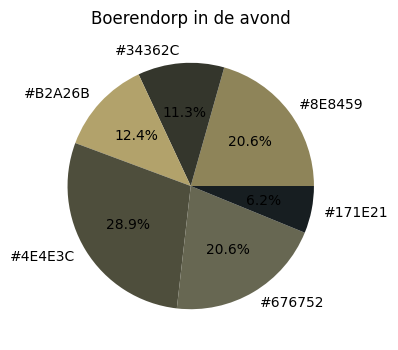

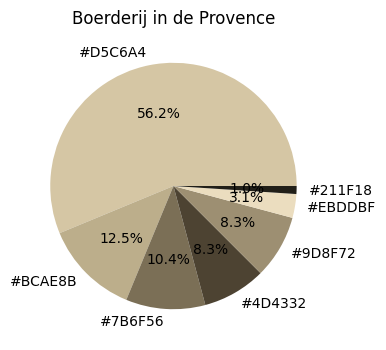

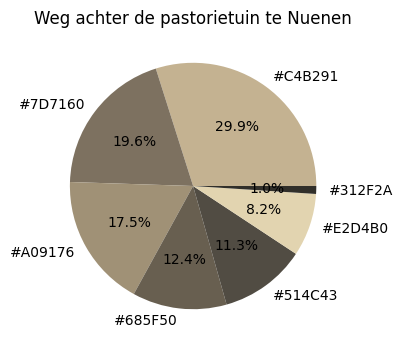

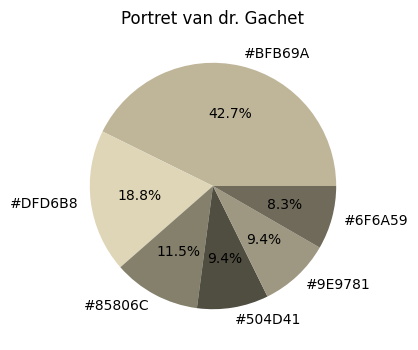

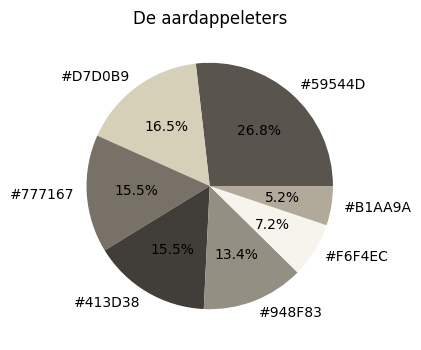

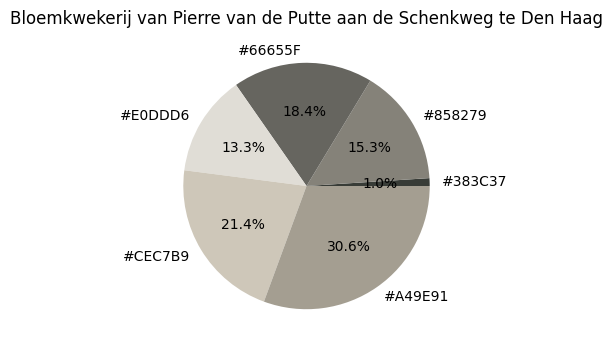

In [ ]:
paintings_vangogh = df_v.iloc[:,[2,8]]

# Loop over each painting and create a pie chart
for i in range(len(paintings_vangogh)):
    # Get the color data for the painting
    colors = paintings_vangogh.iloc[i]['colors']

    color_codes = []
    percentages = []
    for color in colors:
        if color['percentage'] != 0:
            color_codes.append(color['hex'].strip())
            percentages.append(color['percentage'])
    
    # Create the pie chart
    if color_codes and percentages:
      fig, ax = plt.subplots(figsize=(4, 4))
      ax.pie(percentages, labels=color_codes, colors=color_codes, autopct='%1.1f%%')
      ax.set_title(paintings_vangogh.iloc[i]['title'])
    
    # Show the plot
    plt.show()

The Vincent van Gogh data extracted from Rijksmuyseum is quite small so I want to get more artworks from other source. Wikipedia has a more complete dataset of Vincent van Gogh with key parameters including image, date and location. The only issue of it is the lack of hex color code. Then, I find out the method of extracting hex code from the image which will help to fufill my dataset.

## Step2 Data Supplement: Wikipedia API + Image hex code extraction

In [128]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_works_by_Vincent_van_Gogh"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [ ]:
# #display max columns
pd.set_option('display.max_rows',None)

In [203]:
# For all paintings, there are 6 tables with different created locations. Get all tables and append them together;
# The tables are: Paintings (Nuenen-Antwerp),Paintings (Paris),Paintings (Arles),Paintings (Saint-Rémy),Paintings (Auvers-sur-Oise);
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table', {'class':"wikitable"})
tables_paintings = []
for i in range(1, 7):
    table = pd.read_html(str(tables))[i]
    tables_paintings.append(table)

# concatenate the tables together
df_VVG = pd.concat(tables_paintings)

# reset the index
df_VVG.reset_index(inplace=True, drop=True)

# print the first few rows of the concatenated dataframe
df_VVG

,Image Title,Date,Current location,Created in,"Medium, Dimensions",.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}No.,No.,Catalogue No.
0,Still Life with Cabbage and Clogs,November-December 1881,"Van Gogh Museum, Amsterdam",The Hague,Oil on paper on panel 34 x 55 cm,F 1 JH 81,NaN,NaN
1,Beach at Scheveningen in Calm Weather,August 1882,"Minnesota Marine Art Museum, Winona",The Hague,35.5 x 49.5 cm,F 2 JH 173,NaN,NaN
2,Dunes,August 1882,Private collection,The Hague,Oil on panel 36 x 58.5 cm,F 2a JH 176,NaN,NaN
3,Women Mending Nets in the Dunes,August 1882,Private collection,The Hague,Oil on paper on panel 42 x 62.5 cm,F 7 JH 178,NaN,NaN
4,"A Girl in the Street, Two Coaches in the Backg...",August 1882,"Villa Flora, Winterthur",The Hague,Oil on canvas on panel 42 x 53 cm,F 13 JH 179,NaN,NaN
5,Girl in the Woods (van Gogh) [Wikidata],August 1882,Private collection,The Hague,Oil on panel 35 x 47 cm,F 8a JH 180,NaN,NaN
6,Two Women in the Woods,August 1882,Private collection,The Hague,Oil on paper on panel 35 x 24.5 cm,F 1665 JH 181,NaN,NaN
7,Girl in White in the Woods,August 1882,"Kröller-Müller Museum, Otterlo",The Hague,39 x 59 cm,F 8 JH 182,NaN,NaN
8,Edge of a Wood,August 1882,"Kröller-Müller Museum, Otterlo",The Hague,Oil on canvas on panel 34.5 x 49 cm,F 192 JH 184,NaN,NaN
9,Man Stooping with Stick or Spade,August 1882,"Kubosō Memorial Museum of Arts, Izumi",The Hague,Oil on paper on panel 31 x 29.5 cm,F 12 JH 185,NaN,NaN


Vincent van Gogh produced more than 2,000 artworks, consisting of around 900 paintings and 1,100 drawings and sketches. Here, we gathered 868 oil paintings of him.(Exclude his water color, drawings and sketches)

In [263]:
#Clean the dataframe VVG(Vincent van Gogh), drp unwanted colums,rename column names;
data_VVG = df_VVG.drop(['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}No.','No.','Catalogue No.','Medium, Dimensions'],axis=1)
data_VVG = data_VVG.rename(columns = {'Image Title':'Title','Created in':'Place Created','Current location':'Place Stored'})
data_VVG

,Title,Date,Place Stored,Place Created
0,Still Life with Cabbage and Clogs,November-December 1881,"Van Gogh Museum, Amsterdam",The Hague
1,Beach at Scheveningen in Calm Weather,August 1882,"Minnesota Marine Art Museum, Winona",The Hague
2,Dunes,August 1882,Private collection,The Hague
3,Women Mending Nets in the Dunes,August 1882,Private collection,The Hague
4,"A Girl in the Street, Two Coaches in the Backg...",August 1882,"Villa Flora, Winterthur",The Hague
5,Girl in the Woods (van Gogh) [Wikidata],August 1882,Private collection,The Hague
6,Two Women in the Woods,August 1882,Private collection,The Hague
7,Girl in White in the Woods,August 1882,"Kröller-Müller Museum, Otterlo",The Hague
8,Edge of a Wood,August 1882,"Kröller-Müller Museum, Otterlo",The Hague
9,Man Stooping with Stick or Spade,August 1882,"Kubosō Memorial Museum of Arts, Izumi",The Hague


In [205]:
#check NA values;
data_VVG.isna().sum()

Title            0
Date             0
Place Stored     0
Place Created    0
dtype: int64

In [ ]:
#check duplicates;
#data_VVG.drop_duplicates(inplace = True)
#data_VVG

In [206]:
#check data types;
data_VVG.dtypes

Title            object
Date             object
Place Stored     object
Place Created    object
dtype: object

In [207]:
#check wrong value;
data_VVG['Place Created'].value_counts()
# Two wrong value

Paris              226
Nuenen             192
Arles              186
Saint-Rémy         143
Auvers-sur-Oise     77
The Hague           27
Antwerp              7
Nieuw-Amsterdam      3
Drenthe              3
Scheveningen         1
38.8 x 31.3 cm       1
43.2 x 34.2 cm       1
Amsterdam            1
Name: Place Created, dtype: int64

In [208]:
#locate wrong values, 137/143
data_VVG.loc[(data_VVG['Place Created'] == '38.8 x 31.3 cm')]
#data_VVG.loc[(data_VVG['Place Created'] == '43.2 x 34.2 cm')]

,Title,Date,Place Stored,Place Created
137,Head of a Woman,"Van Gogh Museum, Amsterdam",Nuenen,38.8 x 31.3 cm


In [264]:
#replace wrong values;
data_VVG.loc[137,['Date','Place Stored','Place Created']] = ['1885','Van Gogh Museum, Amsterdam','Nuenen']
data_VVG.loc[143,['Date','Place Stored','Place Created']] = ['April 1885','Van Gogh Museum, Amsterdam','Nuenen']

In [210]:
data_VVG['Date'].value_counts()

1887                      130
1886                       94
June 1890                  38
September 1889             24
July 1890                  24
August 1888                23
June 1888                  22
May 1890                   21
October 1889               19
March 1885                 19
November 1884              18
September 1885             17
November 1889              16
June 1889                  15
December 1889              15
January 1885               15
April 1889                 15
January 1889               14
December 1888              14
September 1888             14
August 1882                14
October 1888               13
April 1888                 13
March 1888                 11
August 1883                11
November 1888              11
April 1885                 11
May 1885                   10
February 1890              10
June 1885                  10
May 1888                   10
November-December 1888      9
October 1885                9
December 1

In [1]:
#replace period to a particular year;
replace = {'1884-85': '1885', '1885-86': '1886'}
data_VVG['Date'] = data_VVG['Date'].replace(replace, regex=True)

#use re to extract 4digit from the date;
def get_year(date):
   year = re.findall(r'\d{4}', date)
   if year:
       return int(year[0])
   else:
       return None

data_VVG['Date'] = data_VVG['Date'].apply(get_year)
#data_VVG['Date']

NameError: name 'data_VVG' is not defined

In [272]:
#Groupby date and place, count the number of works as a new column
summary_df = data_VVG.groupby(['Date', 'Place Created'])['Title'].agg('count').reset_index()
summary_df.rename(columns={'Title':'Count'},inplace=True)
summary_df

,Date,Place Created,Count
0,1881,The Hague,1
1,1882,Scheveningen,1
2,1882,The Hague,13
3,1883,Drenthe,3
4,1883,Nieuw-Amsterdam,3
5,1883,The Hague,13
6,1884,Nuenen,53
7,1885,Amsterdam,1
8,1885,Antwerp,6
9,1885,Nuenen,141


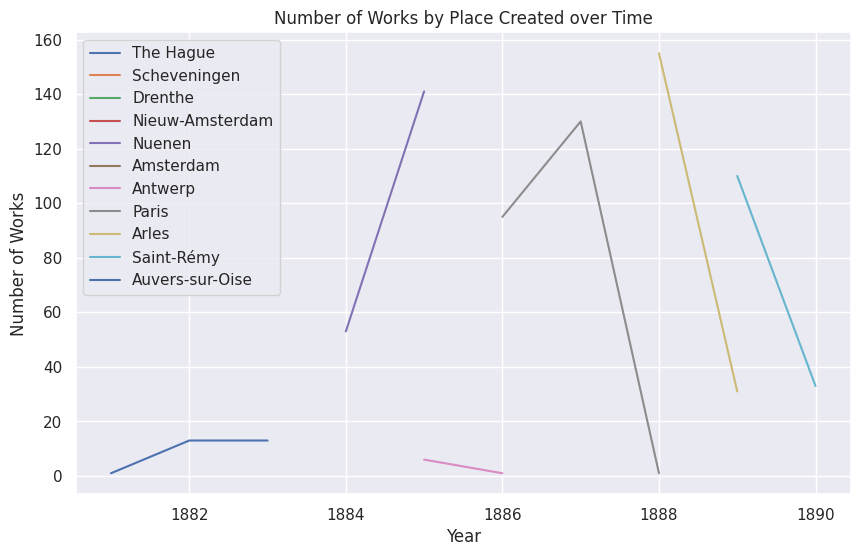

In [283]:
# create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# group the dataframe by place and get the count for each year
grouped = summary_df.groupby(['Place Created','Date']).sum()

# iterate through each place and plot a line for its count over time
for place in summary_df['Place Created'].unique():
    data = grouped.loc[place]
    ax.plot(data.index, data['Count'], label=place)

# set the title and axis labels
ax.set_title('Number of Works by Place Created over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Works')

# add a legend
ax.legend()

# show the plot
plt.show()

## Step3 Data Exploration and Analysis

In [ ]:
#Which city van Gogh created most of his works
data_VVG['Place Created'].value_counts()

Paris              226
Nuenen             194
Arles              186
Saint-Rémy         143
Auvers-sur-Oise     77
The Hague           27
Antwerp              7
Nieuw-Amsterdam      3
Drenthe              3
Scheveningen         1
Amsterdam            1
Name: Place Created, dtype: int64

<Axes: >

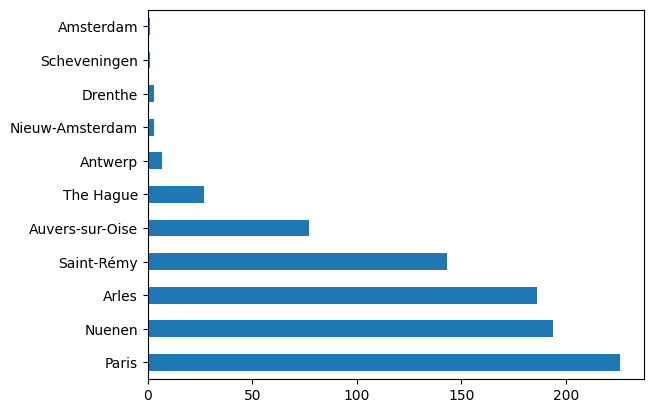

In [ ]:
data_VVG['Place Created'].value_counts().plot.barh()

In [4]:
!pip install folium

     |████████████████████████████████| 102 kB 2.3 MB/s ta 0:00:011


In [5]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# Define the center of the map and the initial zoom level
center = [50.5, 4.0]
zoom = 8

# Create a map object and set the location and zoom level
m = folium.Map(location=center, zoom_start=zoom)

#geometry infomation of our cities;
data = [
    [51.4793455, 5.5426001, 194],
    [43.6766476, 4.6277763, 186],
    [43.7884802, 4.8318786, 143],
    [49.0711875, 2.1700326, 77],
    [51.2211097, 4.3997081, 7],
    [52.7092188, 6.8659616, 3],
    [52.8573817, 6.8066461, 3],
    [52.1033162, 4.3033528, 1],
    [48.85809, 2.35299, 226],
    [52.3519145, 4.9146943, 1],
    [52.0800368, 4.2699613, 27]
]
HeatMap(data).add_to(m)
m.save('map_VVG.html')
m

## Summery:
**Vincent van Gogh**

**1.Metadata Source:**
Rijksmuseum(hex code, icon description)

Wikidata(location, date )

**2.From Colors to Normalized Colors:**

The metadata in Rijksmuseum contains two types of color data. By comparing the color composition of a Vincent van Gogh's painting, I notice that normalized color seems more vivid than the original color but no clear pattern is found when comparing the RGB degrees.

**3.Time and Place:**

The dataset I summerized contains 868 oil paintings of van Gogh.By adding parameters of 'Date' and 'Place', the largest proportion of paintings by van Gogh was created in Paris instead of the Netherlands. However, the peak year of him is 1888 when he created the biggest amount of works in Arles(a cultural and religious centre during the late Roman Empire).Here he created the world-renowed artworks--Starry Night Over the Rhone, Sunflower, Bedroom in Arles.
